In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [7]:
def sigmoid(x,w,b):
    return 1/1+np.exp(-(w*x)+b)

In [8]:
w=-0.9
b=0.1
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)

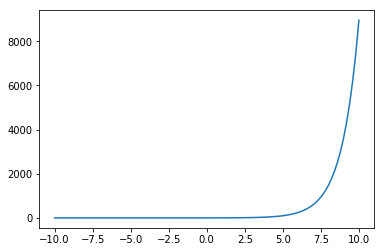

In [9]:
plt.plot(X,Y)
plt.show()

In [10]:
from mpl_toolkits import mplot3d

## Compute loss for a given dataset

In [11]:
w_unknown=0.5
b_unknown=0.25
X=np.random.random(25)*20-10
Y=sigmoid(X,w_unknown,b_unknown)

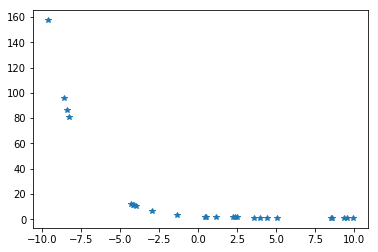

In [12]:
plt.plot(X,Y,'*')
plt.show()

In [13]:
def calculate_loss(X,Y,w_est,b_est):
    loss=0
    for x, y in zip(X,Y):
        loss+=(y-sigmoid(x,w_est,b_est))**2
    return loss

In [14]:
W=np.linspace(0,2,101)
B=np.linspace(-1,1,101)

WW, BB=np.meshgrid(W,B)

Loss=np.zeros(WW.shape)

In [15]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])

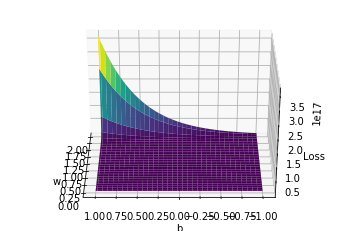

In [16]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30,180)

In [17]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [18]:
print(WW[i,j],  BB[i,j])

0.5 0.24


In [19]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

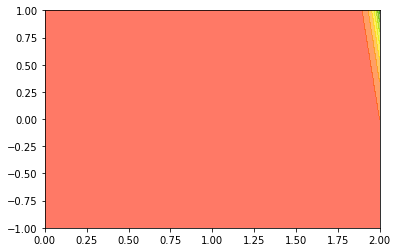

In [20]:
plt.contourf(WW,BB,Loss,cmap=my_cmap,alpha=0.6)
plt.show()

In [21]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y) * y_pred * (1-y_pred) * x
    def grad_b(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y) * y_pred * (1-y_pred)
    def fit(self,X,Y,epochs=1,learning_rate=1, initialise=True, display_loss=False):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        if display_loss:
            loss={}
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw=0
            db=0
            for x, y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db
            
            if display_loss:
                Y_pred=self.sigmoid(self.perceptron(X))
                loss[i]=mean_squared_error(Y_pred,Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean_squared_error')
            plt.show()
    def predict(self,X):
            Y_pred=[]
            for x in X:
                y_pred=self.sigmoid(self.perceptron(x))
                Y_pred.append(y_pred)
            return Y_pred

## Fit for toy data

In [22]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [23]:
sn=SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [24]:
def plot_sn(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1, XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val=np.asarray([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.perceptron(val))
    plt.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    plt.plot()


[[0.49878452 0.5637661 ]] [0.00163814]



[[0.70292264 0.21892323]] [0.02176741]



[[ 0.76923199 -0.29419302]] [0.03021893]



[[ 0.89800201 -0.25890104]] [-0.0333759]



[[ 0.95983386 -0.36062843]] [-0.09482692]



[[ 1.05935263 -0.31294867]] [-0.1458616]



[[ 1.10314155 -0.39676546]] [-0.1961727]



[[ 1.1783429  -0.36700441]] [-0.23801135]



[[ 1.21917766 -0.41664331]] [-0.27869431]



[[ 1.27340263 -0.41270868]] [-0.31391721]


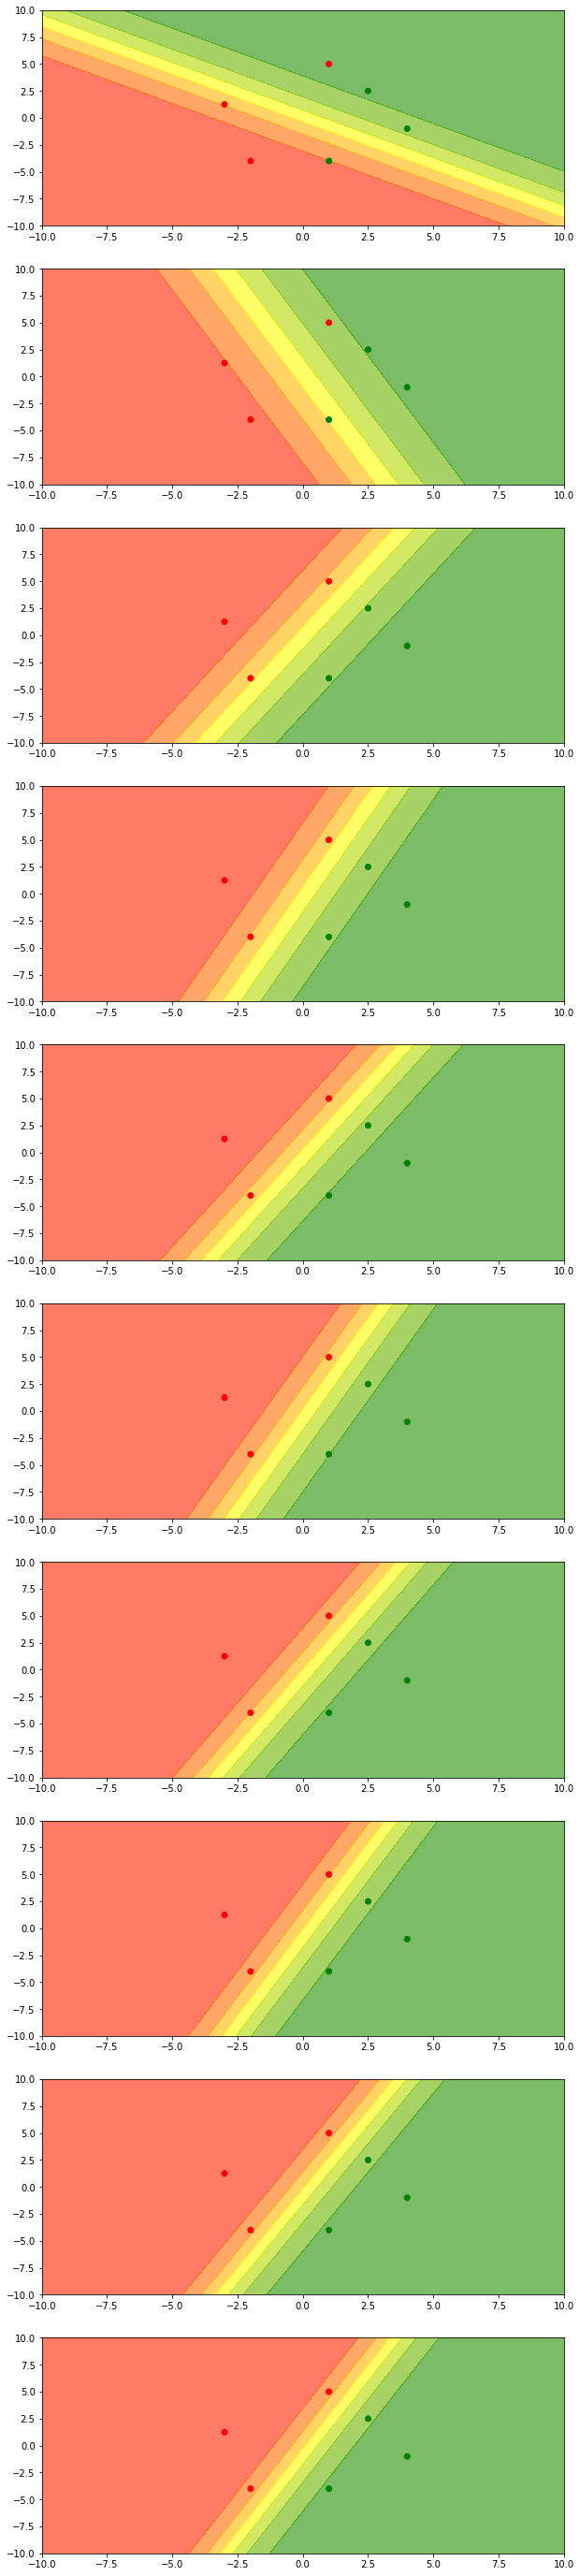

In [25]:
sn.fit(X,Y,1,0.05,True)
N=10
plt.figure(figsize=(10,N*5))
for i in range(N):
    print(sn.w,  sn.b)
    ax=plt.subplot(N,1,i+1)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.5,False)

## Load real World Data

In [26]:
data=pd.read_csv("C:/Users/user/Downloads/mobile_cleaned-1551253091700.csv")

In [27]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [28]:
X=data.drop('Rating',axis=1)
Y=data['Rating'].values

In [29]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [30]:
threshold=4.2
data['class']=(data['Rating']>=threshold).astype(np.int)

In [31]:
data['class']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
311    0
312    0
313    1
314    1
315    0
316    0
317    0
318    0
319    0
320    0
321    1
322    1
323    1
324    0
325    0
326    1
327    0
328    0
329    0
330    0
331    1
332    0
333    0
334    0
335    1
336    0
337    0
338    0
339    0
340    1
Name: class, Length: 341, dtype: int32

In [32]:
data['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [33]:
Y_binarised=data['class'].values

## Standardisation

In [34]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [35]:
scaler=StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)

E:\main\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\main\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
X_scaled_test=scaler.transform(X_test)

E:\main\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [37]:
minmax_scaler=MinMaxScaler()

In [38]:
Y_scaled_train=minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [39]:
Y_scaled_test=minmax_scaler.transform(Y_test.reshape(-1,1))

In [40]:
scaled_threshold=list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [41]:
scaled_threshold

0.6800000000000002

In [42]:
Y_binarised_train=(Y_scaled_train>scaled_threshold).astype('int').ravel()

In [43]:
Y_binarised_test=(Y_scaled_test>scaled_threshold).astype('int').ravel()

## Training

In [44]:
sn=SigmoidNeuron()

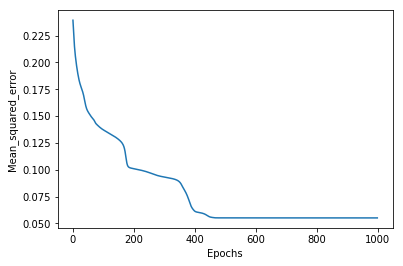

In [45]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=1000, learning_rate=0.015, display_loss=True)

In [46]:
y_pred_train=sn.predict(X_scaled_train)
y_pred_test=sn.predict(X_scaled_test)

In [47]:
y_pred_binarised_train=(y_pred_train>scaled_threshold).astype('int').ravel()
y_pred_binarised_test=(y_pred_test>scaled_threshold).astype('int').ravel()

In [48]:
accuracy_train=accuracy_score(y_pred_binarised_train,Y_binarised_train)
accuracy_test=accuracy_score(y_pred_binarised_test,Y_binarised_test)

In [49]:
print(accuracy_train, accuracy_test)

0.7333333333333333 0.7325581395348837
